In [1]:
# Ask, Prepare, Process, Analyze, Share, Act

# 1. Ask question about why you are exploring a particular column
# 2. Analyze and give insights about the column you explored 
# 3. 


# 1 Developer Profile 
# 2 Data Scientist and Analyst
<ul>
    <li>Technologies they use, and Popular technologies among them</li>
    <li>Salary</li>
    <li>Female male ratio</li>
</ul>

# 3 Work and Employment 
<ul>
    <li>How many people work from home, how many in data science/analyst related</li>
    <li>full time work and part time work</li>
    <li>Employed vs unemployed</li>
    <li>Look for all the above questions in respect to data science related jobs and Female representation ratio</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


<h3> Loading Data</h3>

In [3]:
survey_raw_df = pd.read_csv("./stack_overflow_developer_survey_2022/survey_results_public.csv")

In [5]:
schema_raw_df = pd.read_csv("./stack_overflow_developer_survey_2022/survey_results_schema.csv")

In [5]:
survey_raw_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [6]:
columnNames = survey_raw_df.columns

In [7]:
schema_raw_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


The `survey` dataset contains responses to questions given in the `schema` dataset. It has around 79 questions (some of them are unnecessory columns).<br>
<br>
Let's get all the questions 

In [8]:
# newvalues = schema_raw_df.drop(schema_raw_df[schema_raw_df['qname'].isin(['MetaInfo', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])].index)
schema_raw_df.drop(schema_raw_df[schema_raw_df['qname'].isin(['MetaInfo', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])].index, inplace=True)

In [9]:
schema_raw_df = schema_raw_df.set_index('qname')['question'].squeeze()

In [10]:
schema_raw_df["LearnCodeOnline"]

'What online resources do you use to learn to code? Select all that apply.'

schema_raw_df contains questions for the columns in survey_raw_df.

<h2>Data Preparation and Cleaning</h2><br>
    The stackoverflow survey dataset contains a wealth of information, but Let's divide our analysis into the following sections:<br>
    <ul><li><h3>Developer Profile</h3></li>
    <li><h3>Data Scientist and Analyst</h3></li>
    <li><h3>Work and Employment</h3></li>
    

In [11]:
survey_raw_df['PlatformHaveWorkedWith']

0                                           NaN
1                                           NaN
2                                           NaN
3                                           NaN
4                      Firebase;Microsoft Azure
                          ...                  
73263             AWS;DigitalOcean;Google Cloud
73264                                       NaN
73265    Managed Hosting;Microsoft Azure;VMware
73266                                       NaN
73267                           Microsoft Azure
Name: PlatformHaveWorkedWith, Length: 73268, dtype: object

In [12]:
selected_columns_questions = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    # Education 
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    # Programming experience
    'YearsCode',
    'YearsCodePro',
    'Language',
    'Database',
    'Platform',
    # Employment
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'DevType',
    'WorkExp',
    'CompTotal',
    'CompFreq',
    'Currency',
    # Other
    'TimeSearching',
    'TimeAnswering'
]

## Language = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
## Database = ['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']
## Platform = ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith']


In [13]:
len(selected_columns_questions)

23

In [14]:
questionsData = schema_raw_df[selected_columns_questions]

In [15]:
questionsData

qname
Country                 Where do you live? <span style="font-weight: b...
Age                                                     What is your age?
Gender                  Which of the following describe you, if any? P...
Ethnicity               Which of the following describe you, if any? P...
EdLevel                 Which of the following best describes the high...
LearnCode               How did you learn to code? Select all that apply.
LearnCodeOnline         What online resources do you use to learn to c...
LearnCodeCoursesCert    What online courses or certifications do you u...
YearsCode               Including any education, how many years have y...
YearsCodePro            NOT including education, how many years have y...
Language                Which <b>programming, scripting, and markup la...
Database                Which <b>database environments </b>have you do...
Platform                Which <b>cloud platforms</b> have you done ext...
Employment              Which of

In [16]:
# Cleaning html tags 
questionsData = questionsData.str.replace(r'<[^<>]*>', '', regex=True)

Following columns are in combined form in schema_raw_df<br>
Language = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'] <br>
Database = ['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith'] <br>
Platform = ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith'] <br>


In [17]:
selected_columns_survey = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'Ethnicity',
    # Education 
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    # Programming experience
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'PlatformHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseWantToWorkWith',
    'PlatformWantToWorkWith',
    # Employment
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'DevType',
    'WorkExp',
    'CompTotal',
    'CompFreq',
    'Currency',
    # Other
    'TimeSearching',
    'TimeAnswering'
]


Let's extract a copy of the data from these selected columns into a new data frame `survey_df`, which we can continue to modify further without affecting the orginal data frame. 

In [18]:
survey_df = survey_raw_df[selected_columns_survey].copy()

In [19]:
survey_df.shape

(73268, 26)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   Ethnicity               69474 non-null  object 
 4   EdLevel                 71571 non-null  object 
 5   LearnCode               71580 non-null  object 
 6   LearnCodeOnline         50685 non-null  object 
 7   LearnCodeCoursesCert    29389 non-null  object 
 8   YearsCode               71331 non-null  object 
 9   YearsCodePro            51833 non-null  object 
 10  LanguageHaveWorkedWith  70975 non-null  object 
 11  DatabaseHaveWorkedWith  60121 non-null  object 
 12  PlatformHaveWorkedWith  49924 non-null  object 
 13  LanguageWantToWorkWith  67027 non-null  object 
 14  DatabaseWantToWorkWith  51014 non-null

#### Data Cleaning

converting YearsCode and YearsCodePro to numeric data types.

In [21]:
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')


In [22]:
## replacing multiple selected values from Gender column by np.nan
survey_df.where(survey_df['Gender'].isin(['Man', 'Woman', 'Prefer not to say']), np.nan, inplace=True)

Let's take a look at all the columns one by one.

In [23]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29402
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15048
Some college/university study without earning a degree                                 8909
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7526
Associate degree (A.A., A.S., etc.)                                                    2176
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2082
Primary/elementary school                                                              1683
Something else                                                                         1138
Professional degree (JD, MD, etc.)                                                     1085
Name: EdLevel, dtype: int64

In [24]:
survey_df.LanguageHaveWorkedWith.isnull().sum()

4788

# Clean the data later when you find what you wish to clean

### Exploratory Data Analysis and Visualization

In [25]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


## Developer Profile
What we can know about the global community of developers 

### Demographics
#### Country
Let's look at the number of countries from which there are responses in the survey, and plot the 10 countries with the highest number of responses.

In [26]:
questionsData['Country']

'Where do you live? *'

In [27]:
survey_df['Country'].nunique()

180

The survey received responses from individuals residing in 180 different countries. However, we will plot 20 countries with the highest number of respondents 

In [28]:
top_countries = survey_df.Country.value_counts().head(20)

In [29]:
top_countries.rename(index={'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'}, inplace=True)

Lets' plot a bar chart 

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Where do you live? *'}>

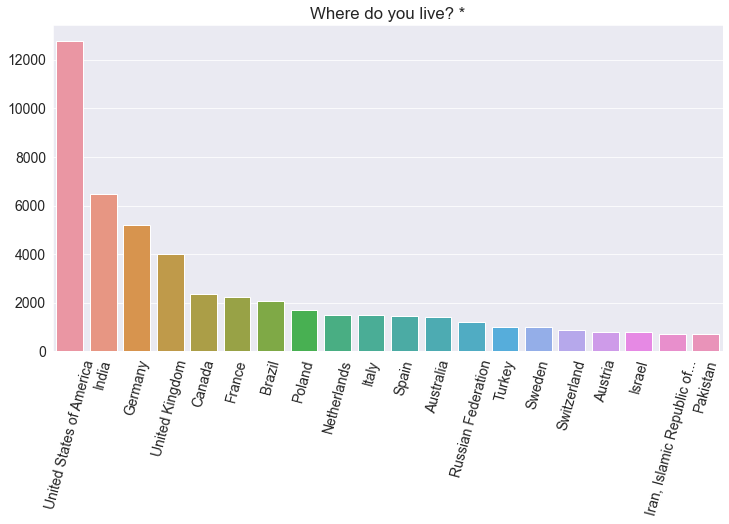

In [30]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(questionsData['Country'])
sns.barplot(top_countries.index, top_countries.values)

It appears that the majority of the responses are from English-speaking countries, with the USA having the highest number of responses. This may suggest that the survey is not a fully representative global sample of all countries.

#### Age
Lets look the age of all respndents vs professional developers

In [31]:
age_percents = (survey_df.Age.value_counts()/survey_df.Age.value_counts().sum())*100

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


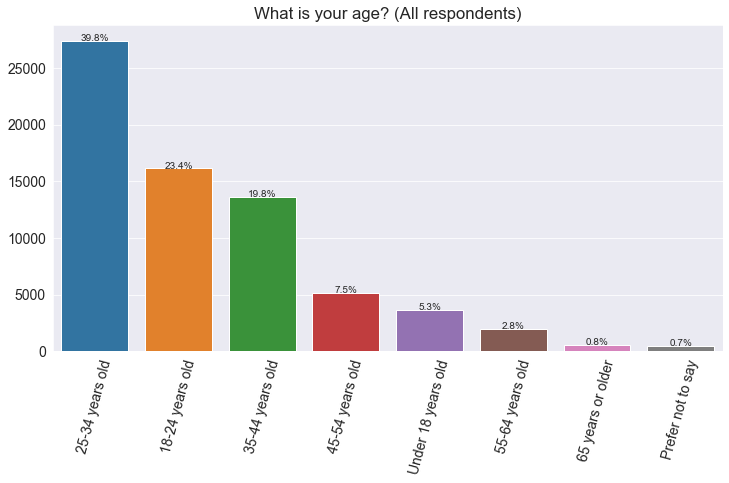

In [32]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(questionsData['Age'] + " (All respondents)")
ax = sns.barplot(survey_df.Age.value_counts().index, survey_df.Age.value_counts().values)

for i, v in enumerate(survey_df.Age.value_counts().values):
    ax.text(i, v, f"{age_percents[i]:.1f}%", ha='center', fontsize=10)

plt.show()

Approximately 82% of the respondents fall within the age range of 18 to 44 years old.

In [33]:
def split_column_to_matrix(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


In [34]:
employment_df = split_column_to_matrix(survey_df.Employment)

In [35]:
prof_developers = survey_df[employment_df['Employed, full-time'] | employment_df['Independent contractor, freelancer, or self-employed'] | employment_df['Employed, part-time'] | employment_df['Retired']]

In [36]:
learningToCode_developers = survey_df[~(employment_df['Employed, full-time'] | employment_df['Independent contractor, freelancer, or self-employed'] | employment_df['Employed, part-time'])]

###### Professional Developers

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


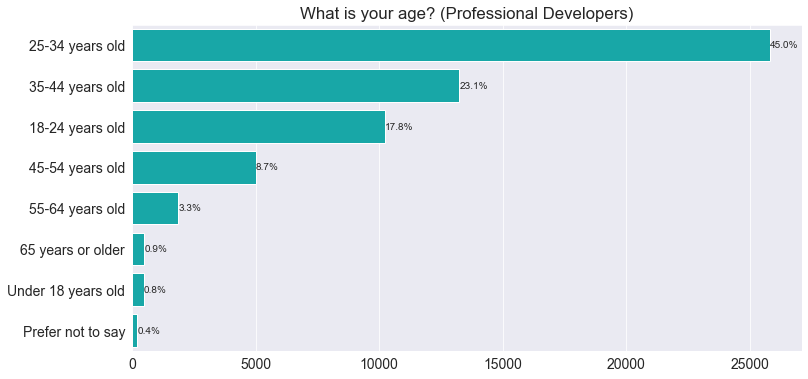

In [37]:
age_percents = (prof_developers.Age.value_counts()/prof_developers.Age.value_counts().sum())*100
plt.figure(figsize=(12, 6))
plt.title(questionsData['Age'] + " (Professional Developers)")
ax = sns.barplot(prof_developers.Age.value_counts().values, prof_developers.Age.value_counts().index, color='c', orient='h', order=None)

for i, v in enumerate(prof_developers.Age.value_counts().values):
    ax.text(v, i, f"{age_percents[i]:.1f}%", va='center', fontsize=10)

plt.show()

45% Professional Developers are between the age of 25-34. Which is nearly the half of all the respondents. 

###### Learning to Code

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


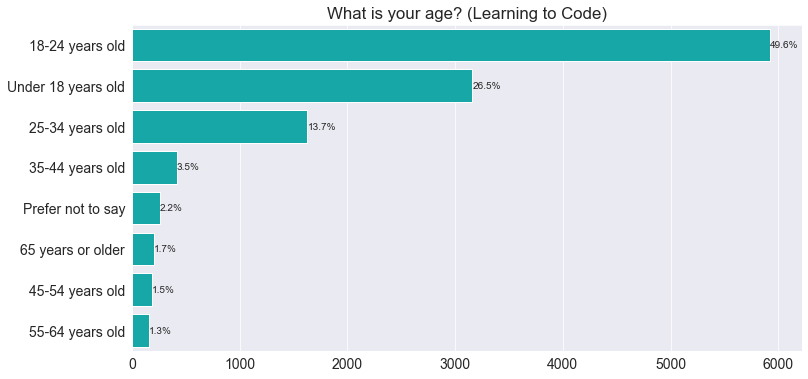

In [38]:
age_percents = (learningToCode_developers.Age.value_counts()/learningToCode_developers.Age.value_counts().sum())*100
plt.figure(figsize=(12, 6))
plt.title(questionsData['Age'] + " (Learning to Code)")
ax = sns.barplot(learningToCode_developers.Age.value_counts().values, learningToCode_developers.Age.value_counts().index, color='c', orient='h', order=None)

for i, v in enumerate(learningToCode_developers.Age.value_counts().values):
    ax.text(v, i, f"{age_percents[i]:.1f}%", va='center', fontsize=10)

plt.show()

Over 75% of respondents who are learning to code are under the age of 25 years old.

#### Gender 

In [39]:
questionsData['Gender']

'Which of the following describe you, if any? Please check all that apply.'

In [40]:
gender_counts = survey_df['Gender'].value_counts(dropna=True)

([<matplotlib.patches.Wedge at 0x1f42df80820>,
 [Text(-1.0763849531317158, 0.2267056079404169, 'Man'),
  Text(1.0628001707905759, -0.28364731087659356, 'Woman'),
  Text(1.0984423160918713, -0.05851904150552755, 'Prefer not to say')],
 [Text(-0.5871190653445723, 0.12365760433113646, '93.39%'),
  Text(0.5797091840675868, -0.1547167150235965, '4.91%'),
  Text(0.5991503542319297, -0.031919477184833206, '1.69%')])

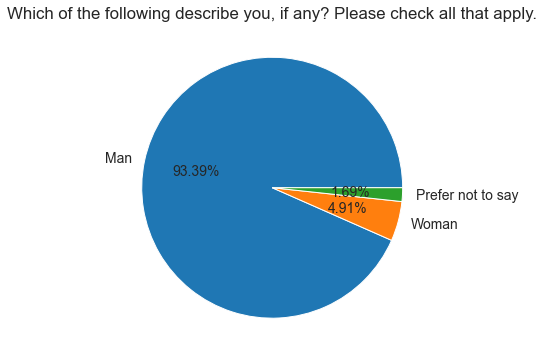

In [41]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['Gender'])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%')

The programming community is predominantly male, with 90% of the respondents identifying themselves as men. This highlights the significant underrepresentation of female and non-binary genders in this field.

In [42]:
learningToCode_developers.Gender.value_counts()

Man                  11003
Woman                  645
Prefer not to say      390
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1f42dfd4a60>,
 [Text(-1.0601165813025155, 0.29351803019144684, 'Man'),
  Text(1.0248078645438046, -0.3997109465215673, 'Woman'),
  Text(1.094307437236268, -0.11176418392933998, 'Prefer not to say')],
 [Text(-0.5782454079831902, 0.16010074374078917, '91.40%'),
  Text(0.5589861079329843, -0.2180241526481276, '5.36%'),
  Text(0.596894965765237, -0.06096228214327635, '3.24%')])

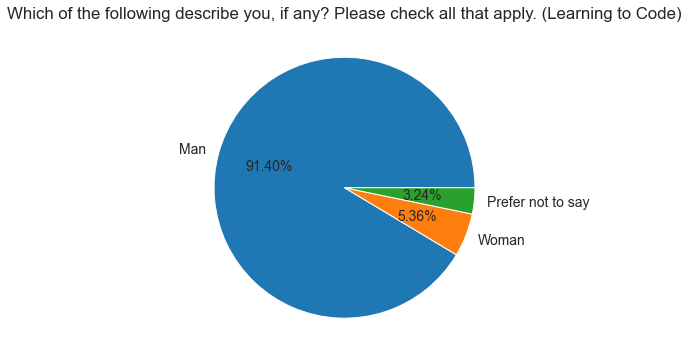

In [43]:
# Gender diversity in Learning to Code
gender_counts = learningToCode_developers['Gender'].value_counts(dropna=True)
plt.figure(figsize=(12, 6))
plt.title(questionsData['Gender'] + ' (Learning to Code)')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%')

Again majority of individuals who are learning to code identify themselves as male. 

In [44]:
genderCountsByCountry = survey_df.groupby('Country').Gender.value_counts()
genderTotals = genderCountsByCountry.groupby(level=0).sum()
genderPercentageByCountry = genderCountsByCountry/genderTotals * 100

In [45]:
# indices of top countries with highest respondents
genderTotals.nlargest(15).index

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Italy', 'Spain',
       'Australia', 'Russian Federation', 'Turkey', 'Sweden'],
      dtype='object', name='Country')

In [46]:
# Top 15 countries with highest respondents and their gender diversity
topCountriesWithGenderPercents = genderPercentageByCountry.unstack().dropna().loc[genderTotals.nlargest(15).index]

In [47]:
topCountriesWithGenderPercents['Woman'].sort_values(ascending=False)

Country
United States of America                                6.348214
Canada                                                  5.469079
India                                                   5.369024
Netherlands                                             5.294507
Brazil                                                  5.155642
Australia                                               5.085960
United Kingdom of Great Britain and Northern Ireland    5.069930
Spain                                                   5.037440
Russian Federation                                      4.037006
Turkey                                                  3.915663
Sweden                                                  3.842265
France                                                  3.808244
Germany                                                 3.589251
Italy                                                   3.455285
Poland                                                  3.250591
Name: Woman, dtyp

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


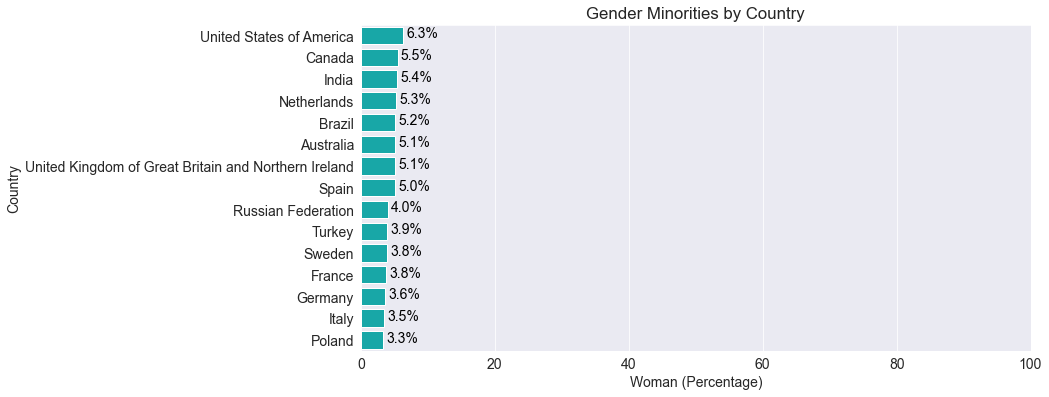

In [48]:
plt.figure(figsize=(12, 6))
plt.title("Gender Minorities by Country")
ax = sns.barplot(topCountriesWithGenderPercents['Woman'].sort_values(ascending=False), topCountriesWithGenderPercents['Woman'].sort_values(ascending=False).index, orient='h', color='c')
ax.set_xlim(0, 100)
plt.xlabel('Woman (Percentage)')

for i, v in enumerate(topCountriesWithGenderPercents['Woman'].sort_values(ascending=False)):
    ax.text(v + 0.5, i + 0.1, f'{v:.1f}%', color='black')

plt.show()

The graph above depicts the percentage of women respondents from different countries.

#### Ethnicity


In [49]:
# Let's split the Ethnicity column into a matrix
race_df = split_column_to_matrix(survey_df.Ethnicity)

In [50]:
race_total_series  = pd.Series(dtype=int)
for i in race_df.columns:
    race_total_series[i] = race_df[i].sum()

In [51]:
race_total_series.sort_values(ascending=False)

White                                                            26512
European                                                         25240
Indian                                                            6618
Asian                                                             6402
Hispanic or Latino/a                                              3845
Middle Eastern                                                    2775
South American                                                    2552
African                                                           2226
North American                                                    2201
South Asian                                                       1744
Prefer not to say                                                 1673
Southeast Asian                                                   1542
Or, in your own words:                                            1331
East Asian                                                        1138
Multir

D:\Anaconda_folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


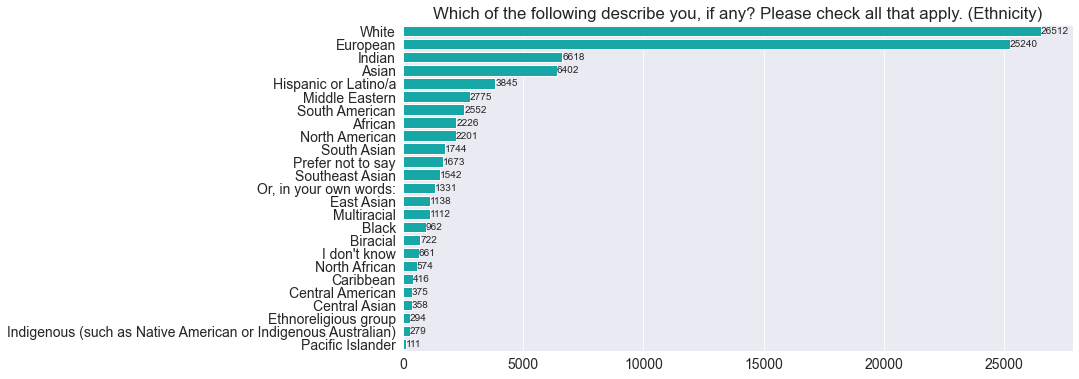

In [52]:
# Drawing a barplot
plt.figure(figsize=(12, 6))
plt.title(questionsData['Ethnicity'] + " (Ethnicity)")
ax = sns.barplot(race_total_series.sort_values(ascending=False), race_total_series.sort_values(ascending=False).index, orient='h', color='c')
for i, v in enumerate(race_total_series.sort_values(ascending=False)):
    ax.text(v, i, f"{v}", va='center', fontsize=10)

plt.show()

### Education Level

In [53]:
questionsData['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

Text(0, 0.5, 'Education Level')

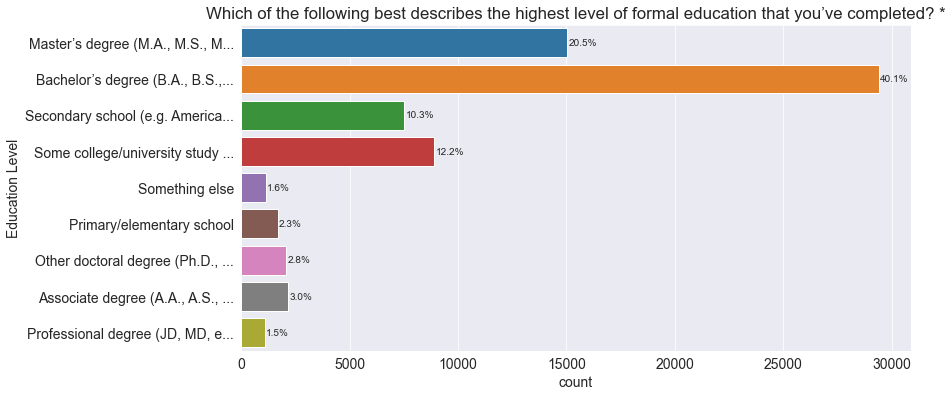

In [54]:
plt.figure(figsize=(12, 6))
plt.title(questionsData['EdLevel'])
ax = sns.countplot(y=survey_df.EdLevel)

# Fixing y axis labels
labels = [label.get_text()[:30] + '...' if len(label.get_text()) > 30 else label.get_text() for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(labels)

# To show percentage 
total = len(survey_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, percentage, ha='left', va='center', fontsize=10)
# Set the y-axis label
plt.ylabel('Education Level')



### Employment 

In [55]:
questionsData.Employment

'Which of the following best describes your current employment status?'

We have around 4k NaN values.
Taking a look at top 12

In [56]:
employment_counts = survey_df.Employment.value_counts(normalize=True).head(12)

In [57]:
employment_counts*100

Employed, full-time                                                         60.289884
Student, full-time                                                           9.220176
Independent contractor, freelancer, or self-employed                         6.980949
Employed, full-time;Independent contractor, freelancer, or self-employed     4.939897
Not employed, but looking for work                                           2.551677
Student, full-time;Employed, part-time                                       1.608540
Employed, part-time                                                          1.562251
Student, part-time                                                           1.453762
Employed, full-time;Student, full-time                                       1.355398
Employed, full-time;Student, part-time                                       1.320681
Student, full-time;Not employed, but looking for work                        1.005338
Student, part-time;Employed, part-time                

Text(0.5, 0, 'Percentage')

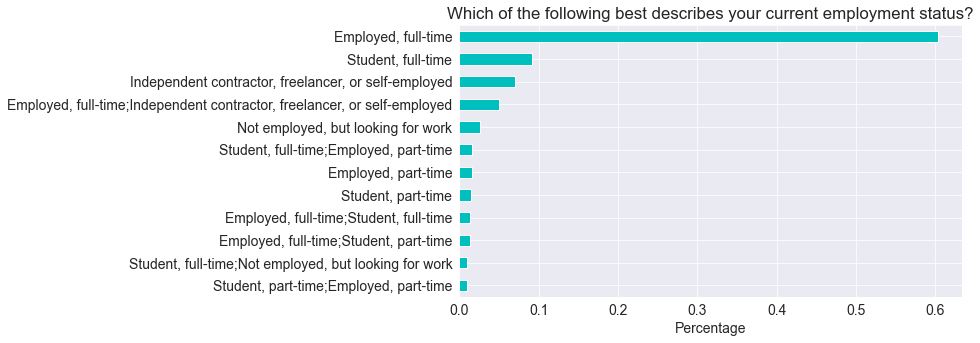

In [58]:
employment_counts[-1::-1].plot(kind='barh', color='c')
plt.title(questionsData.Employment)
plt.xlabel('Percentage')

Talk about it here